<a href="https://colab.research.google.com/github/Madina-Christianne/DataScienceEcosystem/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
# Load dataset
boston_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

# Show first 5 rows to verify data
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**Boxplot: Median Value of Owner-Occupied Homes (MEDV)**

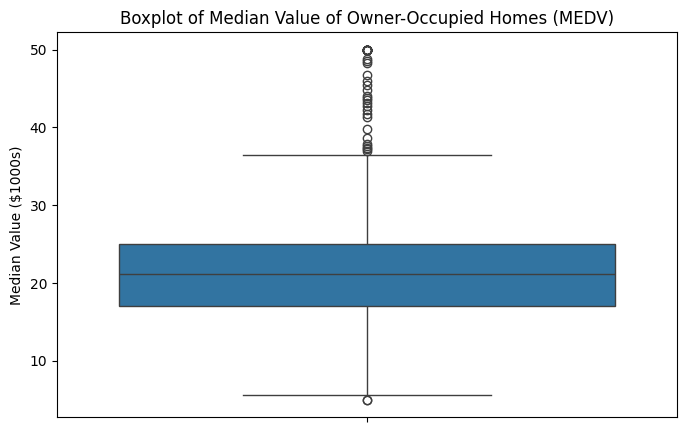

This boxplot shows the distribution of median home values (MEDV) in $1000s. The presence of outliers is indicated by points outside the whiskers.


In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("Median Value ($1000s)")
plt.show()

print("This boxplot shows the distribution of median home values (MEDV) in $1000s. The presence of outliers is indicated by points outside the whiskers.")


**Barplot: Charles River Variable**

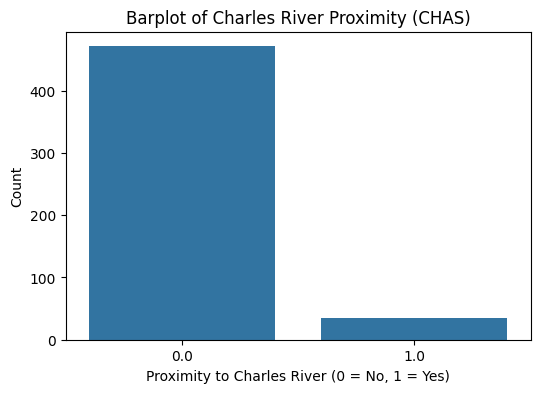

This barplot shows how many properties are located near the Charles River (CHAS = 1) versus those that are not (CHAS = 0).


In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x=boston_df['CHAS'])
plt.title("Barplot of Charles River Proximity (CHAS)")
plt.xlabel("Proximity to Charles River (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print("This barplot shows how many properties are located near the Charles River (CHAS = 1) versus those that are not (CHAS = 0).")


**Boxplot: MEDV vs AGE**

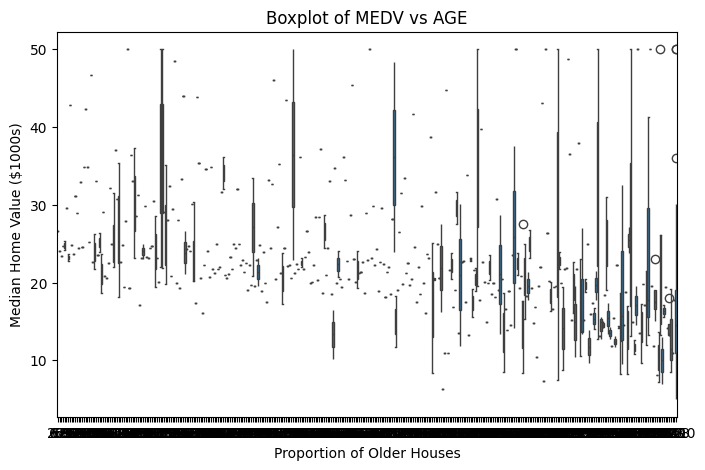

This boxplot shows the distribution of home values (MEDV) based on the proportion of older houses (AGE).


In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=boston_df['AGE'], y=boston_df['MEDV'])
plt.title("Boxplot of MEDV vs AGE")
plt.xlabel("Proportion of Older Houses")
plt.ylabel("Median Home Value ($1000s)")
plt.show()

print("This boxplot shows the distribution of home values (MEDV) based on the proportion of older houses (AGE).")


**Scatter Plot: Nitric Oxide (NOX) vs Business Acres (INDUS)**

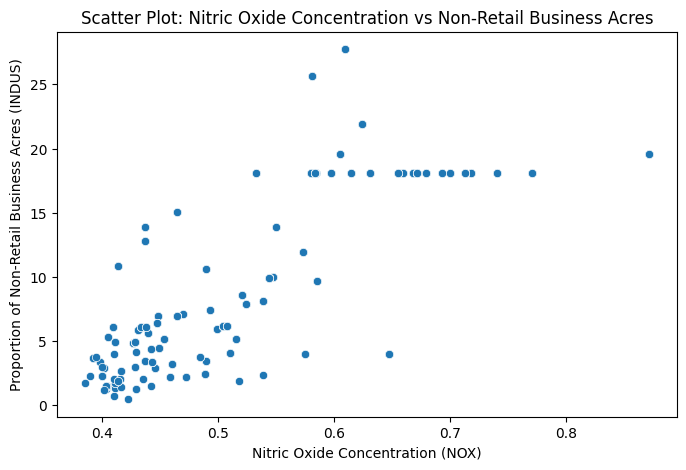

This scatter plot shows the relationship between NOX and INDUS, revealing a possible correlation between pollution levels and business development.


In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title("Scatter Plot: Nitric Oxide Concentration vs Non-Retail Business Acres")
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()

print("This scatter plot shows the relationship between NOX and INDUS, revealing a possible correlation between pollution levels and business development.")


**Histogram: Pupil-to-Teacher Rati**o

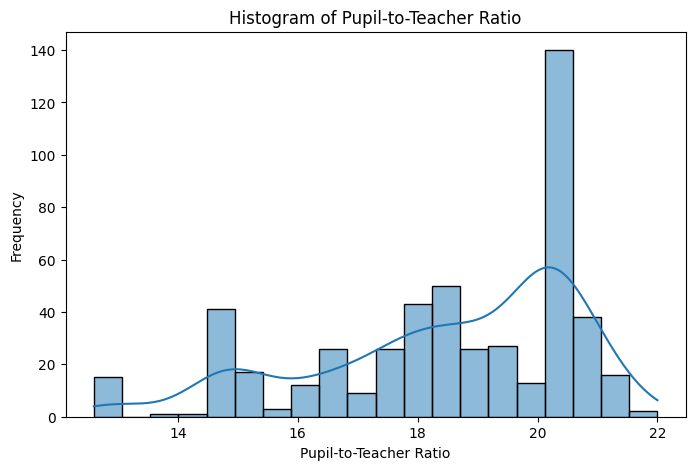

This histogram displays the distribution of pupil-to-teacher ratios in different areas.


In [8]:
plt.figure(figsize=(8,5))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title("Histogram of Pupil-to-Teacher Ratio")
plt.xlabel("Pupil-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

print("This histogram displays the distribution of pupil-to-teacher ratios in different areas.")


**State Null & Alternative Hypotheses**

### **Hypothesis Statements**

1. **Testing if homes near the Charles River have a different median value (t-test)**  
   - **H₀:** There is no difference in median value (MEDV) between homes near the Charles River and those that are not.  
   - **H₁:** Homes near the Charles River have a significantly different median value.

2. **Testing if NOX concentration affects non-retail business acres (Regression Analysis)**  
   - **H₀:** There is no relationship between NOX and INDUS.  
   - **H₁:** Higher NOX levels are associated with higher INDUS values.

3. **Testing if the pupil-to-teacher ratio affects home values (t-test)**  
   - **H₀:** The pupil-to-teacher ratio has no significant effect on home values (MEDV).  
   - **H₁:** Areas with higher pupil-to-teacher ratios have significantly different home values.

4. **Testing the effect of weighted distance to employment centers on home values (Regression Analysis)**  
   - **H₀:** There is no relationship between DIS (weighted distance to employment centers) and MEDV.  
   - **H₁:** Increased distance to employment centers significantly impacts home values.


** Hypothesis Testing: T-Test for Charles River Proximity**

In [15]:
from scipy.stats import ttest_ind

# Split data based on CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform independent t-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("We reject H₀: There is a significant difference in median home values near the Charles River.")
else:
    print("We fail to reject H₀: No significant difference in median home values near the Charles River.")


T-Statistic: -3.9964
P-Value: 0.0001
We reject H₀: There is a significant difference in median home values near the Charles River.


**Regression: Distance to Employment & Home Value**

In [16]:
# Regression Model
model = ols("MEDV ~ DIS", data=boston_df).fit()
print(model.summary())

print("The coefficient for DIS (distance to employment centers) explains the impact on home values.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        08:47:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0